# Online Shoppers Intension

<b>Project Description: </b>Online shopping is the activity or action of buying products or services over the Internet. It means going online, landing on a seller’s website, selecting something, and arranging for its delivery. The buyer either pays for the good or service online with a credit or debit card or upon delivery. The term does not only include buying things online but also searching for them online. In other words, I may have been engaged in online shopping but did not buy anything.
We are going to predict whether the customer will buy the product or just go window shopping. Here, We will be using classification algorithms such as Logistic Regression, Random forest, & Clustering algorithm K-Means. We will train and test the data with these algorithms. From this, the best model is selected and saved in pkl format.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install pickle-mixin

# LOADING THE DATASET

In [3]:
df = pd.read_csv('online1.csv')

In [4]:
# pip install Flask

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.describe(include=["object"])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [9]:
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [10]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [11]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
df = df.drop(df.columns[[0, 1, 2, 3, 11, 12]], axis=1)

In [13]:
df

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


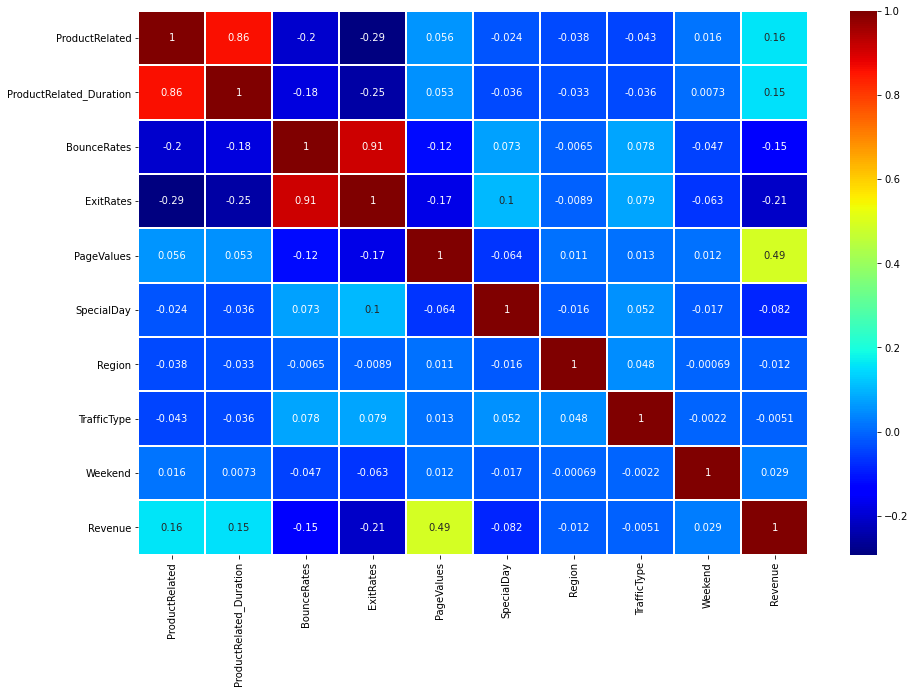

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white');

## LableEncoding
<b>Label encoding is used in this project to convert categorical variables into numeric representations</b>

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

array = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
array1 = le.fit_transform(array)
print(array1)
df['Weekend'] = le.fit_transform(df.Weekend)
df['VisitorType'] = le.fit_transform(df.VisitorType)
df['Month'] = le.fit_transform(df.Month)
df['Revenue'] = le.fit_transform(df.Revenue)

print(df['Month'].unique())
# feb 2, Mar 5, may 6 , oct 8 , jun 4 , july 3 ,aug 0, nov 7, sep 9, dec 1 
df


[ 3  6  0  7  5  4  1 10  9  8  2]
[2 5 6 8 4 3 0 7 9 1]


,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,2,0,0
1,2,64.000000,0.000000,0.100000,0.000000,0.0,2,1,2,2,0,0
2,1,0.000000,0.200000,0.200000,0.000000,0.0,2,9,3,2,0,0
3,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2,4,2,0,0
4,10,627.500000,0.020000,0.050000,0.000000,0.0,2,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,1,1,2,1,0
12326,5,465.750000,0.000000,0.021333,0.000000,0.0,7,1,8,2,1,0
12327,6,184.250000,0.083333,0.086667,0.000000,0.0,7,1,13,2,1,0
12328,15,346.000000,0.000000,0.021053,0.000000,0.0,7,3,11,2,0,0


<b>In the context of the "Online Shoppers Intention Prediction" project, certain features such as "Month," "Region," and "VisitorType" are categorical variables. By applying label encoding, we assign a unique numeric label to each category within these variables. This allows the machine learning model to interpret and analyze the data effectively.</b>

# Uni-variante  Distributions

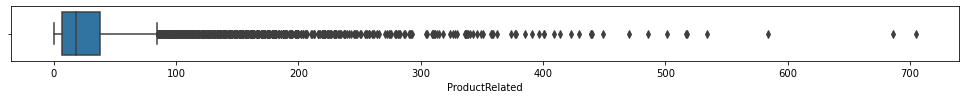

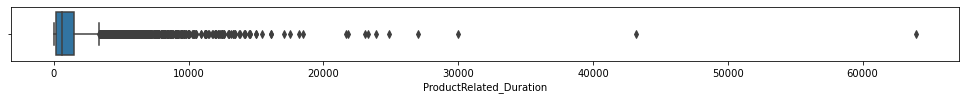

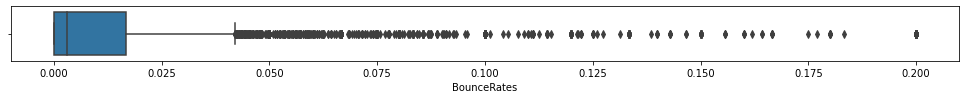

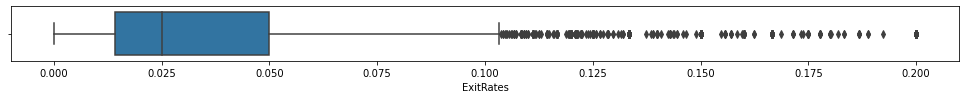

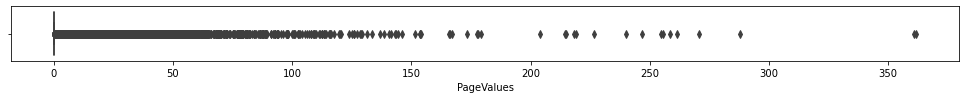

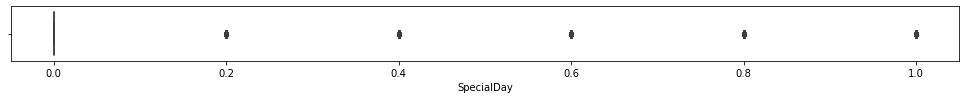

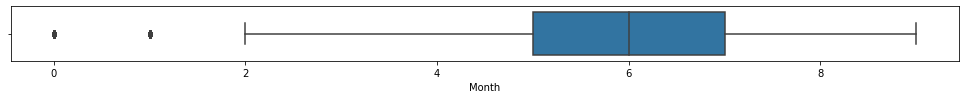

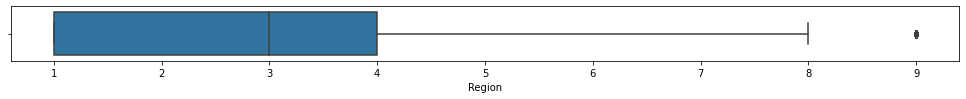

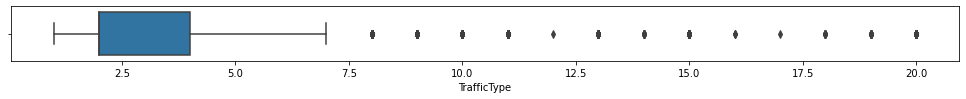

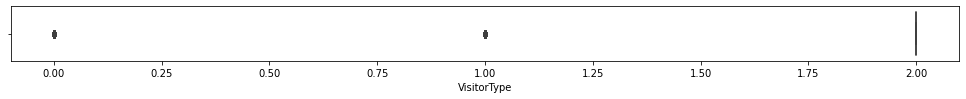

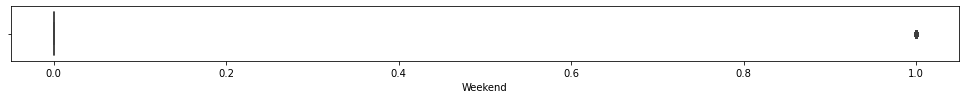

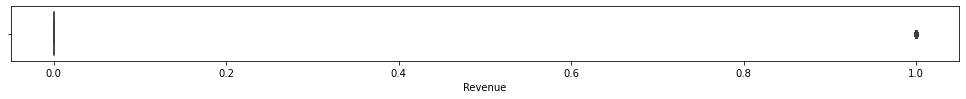

In [16]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column) 

### Box plot used for every column to check outliers

In [17]:
Plot_Revenue = df['Revenue'].value_counts()

([<matplotlib.patches.Wedge at 0x24786fa3fa0>,
 [Text(-0.9725550264946982, 0.5139423318232281, 'yes'),
  Text(0.9725550505540739, -0.5139422862946411, 'no')],
 [Text(-0.5304845599061989, 0.28033218099448803, '84.53'),
  Text(0.5304845730294948, -0.2803321561607133, '15.47')])

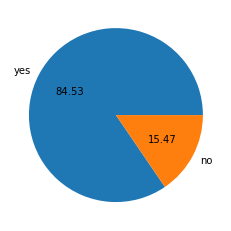

In [18]:
plt.pie(Plot_Revenue,autopct='%.2f',labels = ['yes','no'])

<b> As seen there a huge Disproportionality between True and False Target

(array([4780., 1136., 2403., 1182.,    0.,  318.,  805.,  761.,  434.,
         511.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

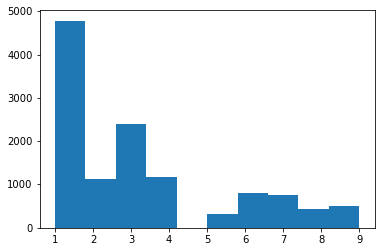

In [19]:
plt.hist(df['Region'])

# Bivariant  Distributions

Text(0.5, 1.0, 'bivariate viz "Region vs Revenue (Which region makes revenue)"')

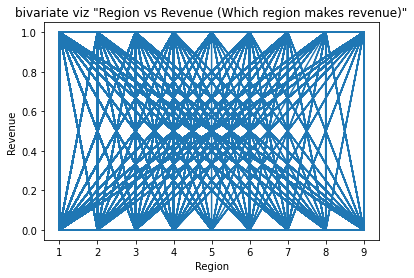

In [20]:
plt.plot(df['Region'],df['Revenue'])
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('bivariate viz "Region vs Revenue (Which region makes revenue)"')

### above image simply explains us that revenue is generated in all the regions

Text(0.5, 1.0, 'bivariate viz "ProductRelated vs ProductRelated_Duration"')

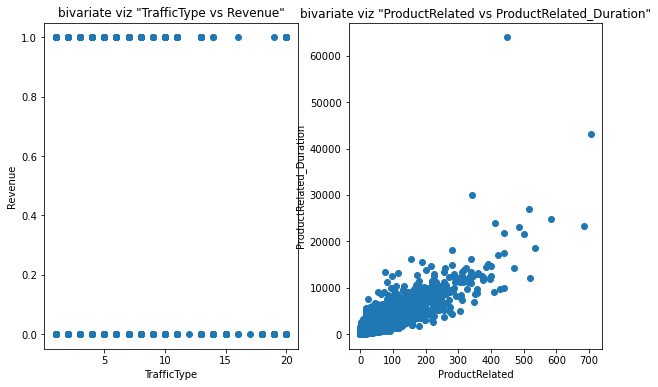

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.scatter(df['TrafficType'],df['Revenue'])
plt.xlabel('TrafficType')
plt.ylabel('Revenue')
plt.title('bivariate viz "TrafficType vs Revenue"')

plt.subplot(1,2,2)
plt.scatter(df['ProductRelated'],df['ProductRelated_Duration'])
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.title('bivariate viz "ProductRelated vs ProductRelated_Duration"')

<b> In the first image we see that the revenue is not generated in every type of traffic type and also revenue is generated in <b>few type of traffic
<b> In the second image we see that the Product Duration is high for product with low rate

# Multi variant  Distributions

<BarContainer object of 12330 artists>

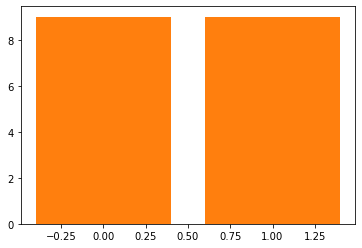

In [22]:
plt.bar(df['Revenue'],df['Weekend'])
plt.bar(df['Revenue'],df['Month'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


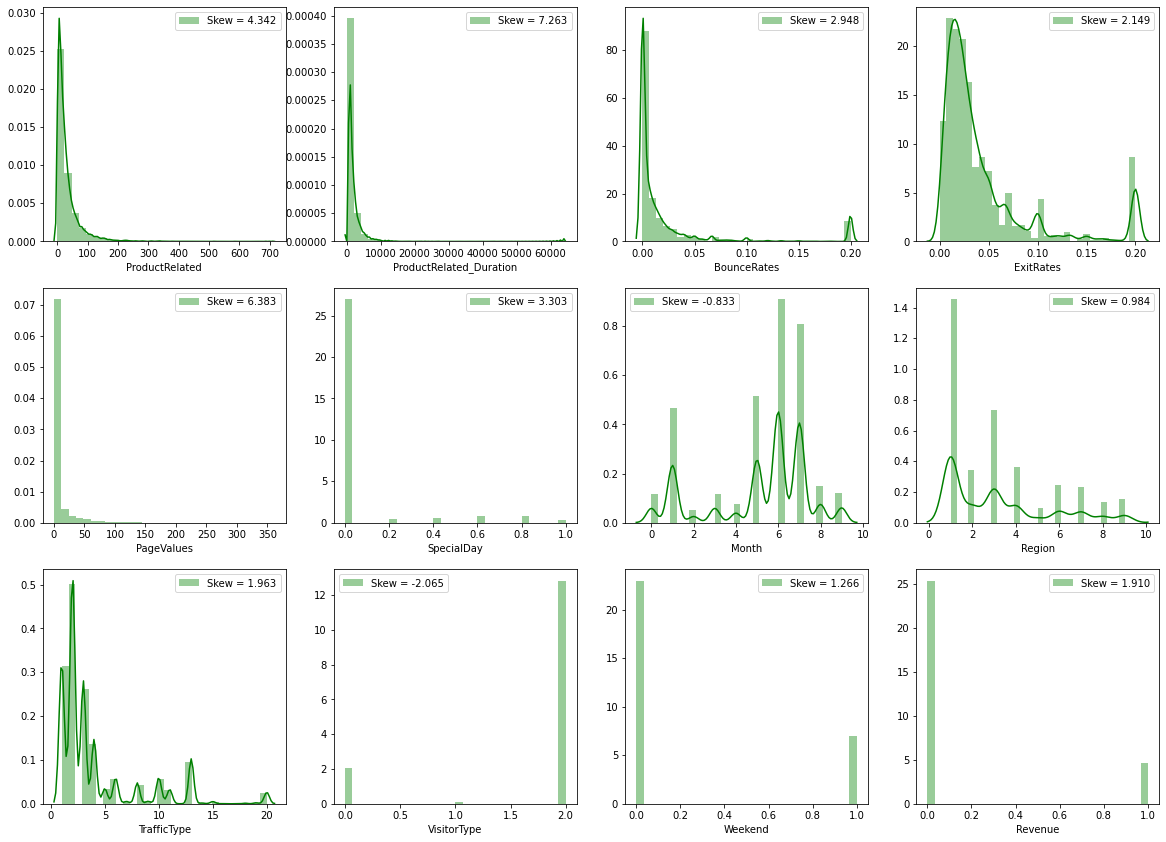

In [23]:
a=[cols for cols in df.columns if df[cols].dtypes != 'O']
plotnumber = 1
plt.figure(figsize=(20,25))
for i in a:
    if plotnumber<= 19:
        ax = plt.subplot(5,4,plotnumber)
        skew = df[i].skew()
        sns.distplot(df[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
        plt.legend(loc='best')
    plotnumber+=1
plt.show();

<b>Skewness analysis allows us to understand the shape and characteristics of the data distribution, which can guide further data preprocessing and analysis steps in the project.</b>

<b>*As here we can find each characteristic for the columns in relation to the target
</b>

In [24]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

## Feature selection

<b>The purpose of removing the target column from the dataset is to ensure that the model does not have direct access to the outcome it is trying to predict during the training phase. This prevents the model from simply memorizing the target values and encourages it to learn the underlying patterns and relationships among the features to make accurate predictions.

In [25]:
y = df['Revenue']

In [26]:
y1 =df.drop(columns=['Revenue'],axis=1)
y1

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,2,0
1,2,64.000000,0.000000,0.100000,0.000000,0.0,2,1,2,2,0
2,1,0.000000,0.200000,0.200000,0.000000,0.0,2,9,3,2,0
3,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2,4,2,0
4,10,627.500000,0.020000,0.050000,0.000000,0.0,2,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,1,1,2,1
12326,5,465.750000,0.000000,0.021333,0.000000,0.0,7,1,8,2,1
12327,6,184.250000,0.083333,0.086667,0.000000,0.0,7,1,13,2,1
12328,15,346.000000,0.000000,0.021053,0.000000,0.0,7,3,11,2,0


### We use oversampling here as the there is dispropotion in the target column



In [27]:
print(y.value_counts())
print(y1)


0    10422
1     1908
Name: Revenue, dtype: int64
       ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0                   1                 0.000000     0.200000   0.200000   
1                   2                64.000000     0.000000   0.100000   
2                   1                 0.000000     0.200000   0.200000   
3                   2                 2.666667     0.050000   0.140000   
4                  10               627.500000     0.020000   0.050000   
...               ...                      ...          ...        ...   
12325              53              1783.791667     0.007143   0.029031   
12326               5               465.750000     0.000000   0.021333   
12327               6               184.250000     0.083333   0.086667   
12328              15               346.000000     0.000000   0.021053   
12329               3                21.250000     0.000000   0.066667   

       PageValues  SpecialDay  Month  Region  TrafficType  Vi

In [28]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [29]:
y.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [30]:
# sns.countplot(x=y,data=df)
# plt.title('Target Distribution')
# plt.xlabel('class')
# plt.ylabel('frequency')



In [31]:
#pip install -U imbalanced-learn

### Oversampling the data by-Random Over Sampler Method

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
os=RandomOverSampler(random_state=0)

In [34]:
x_res2,y_res2=os.fit_resample(y1,y)

In [35]:
count = y_res2.value_counts()

([<matplotlib.patches.Wedge at 0x2479e011a90>,
 [Text(6.735557395310444e-17, 1.1, 'yes'),
  Text(-2.0206672185931328e-16, -1.1, 'no')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

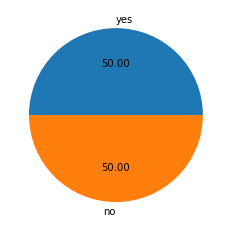

In [36]:
plt.pie(count,autopct='%.2f',labels = ['yes','no'])

<b>We have solved the undersampling problem in the revenue 

In [37]:
x_res2

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,2,0
1,2,64.000000,0.000000,0.100000,0.000000,0.0,2,1,2,2,0
2,1,0.000000,0.200000,0.200000,0.000000,0.0,2,9,3,2,0
3,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2,4,2,0
4,10,627.500000,0.020000,0.050000,0.000000,0.0,2,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
20839,116,2633.084900,0.004482,0.010929,0.000000,0.0,7,1,2,2,0
20840,35,1916.900000,0.000000,0.015556,11.191893,0.2,6,6,3,2,0
20841,51,507.500000,0.007843,0.011671,12.012213,0.0,8,1,1,2,1
20842,53,3575.000000,0.000000,0.003846,119.894333,0.0,7,6,2,2,0


In [38]:
y_res2

0        0
1        0
2        0
3        0
4        0
        ..
20839    1
20840    1
20841    1
20842    1
20843    1
Name: Revenue, Length: 20844, dtype: int64

### We now predict different models on the attribute columns

# Splitting the data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res2,y_res2,test_size=0.2,random_state=0)

# Create Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#data standardization
#Scale the data to be between -1 and 1
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# x = scaler.transform(x_train)
# name = df.columns
# name = name[:-1]
# X=pd.DataFrame(x,columns=name)
# X

In [42]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

#training the model
rf.fit(x_train,y_train)
x_train

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
2074,31,1350.500000,0.006452,0.016129,0.000000,0.0,5,2,2,2,0
16392,193,6784.671131,0.004932,0.021158,0.000000,0.0,7,7,2,2,1
3585,11,183.500000,0.000000,0.018182,0.000000,0.0,6,1,4,0,1
1819,5,164.333333,0.060000,0.060000,0.000000,0.0,5,2,1,2,0
8863,43,898.238889,0.007317,0.031707,8.898619,0.0,7,1,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...
13123,41,2517.583333,0.007752,0.013882,20.554945,0.0,9,1,1,2,0
19648,82,5076.380556,0.000000,0.010982,28.417081,0.0,1,1,13,2,0
9845,202,8217.678753,0.001905,0.013669,3.651726,0.0,7,3,10,2,1
10799,23,338.583333,0.000000,0.008696,0.000000,0.0,7,1,10,2,0


In [43]:
# Test the RandomForestClassifier model
pred=rf.predict(x_test)
pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
accuracy_Randf=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [46]:
print("Accuracy of Random Forest: " )
print(accuracy_Randf)
list_Randf = accuracy_Randf

Accuracy of Random Forest: 
0.9673782681698249


In [47]:
print(conmat)

[[1946  128]
 [   8 2087]]


# We run a classification report on the revenue for random forest model

In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2074
           1       0.94      1.00      0.97      2095

    accuracy                           0.97      4169
   macro avg       0.97      0.97      0.97      4169
weighted avg       0.97      0.97      0.97      4169



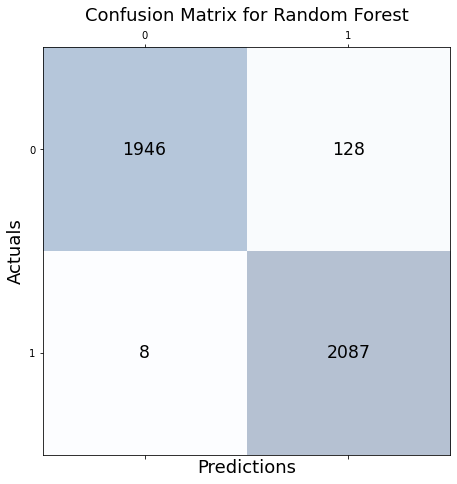

In [49]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Random Forest', fontsize=18)
plt.show()

# Decision tree model

In [50]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

In [51]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [52]:
accuracy_DT=metrics.accuracy_score(y_test, y_pred)
list_DT = accuracy_DT

print("Accuracy of Decision Tree: " )
print(accuracy_DT)

Accuracy of Decision Tree: 
0.953705924682178


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2074
           1       0.92      0.99      0.96      2095

    accuracy                           0.95      4169
   macro avg       0.96      0.95      0.95      4169
weighted avg       0.96      0.95      0.95      4169



# SVM Modeling

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [55]:
# Create and train the SVM model
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)

SVC()

In [56]:
# Create and train the SVM-POLY model

model_poly = SVC(kernel="poly")
model_poly.fit(x_train, y_train)
# Create and train the SVM-LINEAR model

#model_l=SVC(kernel="linear")
#model_l.fit(x_train, y_train)

SVC(kernel='poly')

In [57]:
# Make predictions on the test set
y_predrbf = model_rbf.predict(x_test)
y_predpoly = model_poly.predict(x_test)


In [58]:
# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_predrbf)
accuracy_poly = accuracy_score(y_test, y_predpoly)
#accuracy_SVM = accuracy_score(y_test, y_predl)
list_rbf = accuracy_rbf
list_poly = accuracy_poly
print("Accuracy SVM:", accuracy_rbf)
print("Accuracy SVM:", accuracy_poly)

Accuracy SVM: 0.7289517869992804
Accuracy SVM: 0.5471336051810985


In [59]:
#Classification report for SVM RBF
print(classification_report(y_test,y_predrbf))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2074
           1       0.73      0.73      0.73      2095

    accuracy                           0.73      4169
   macro avg       0.73      0.73      0.73      4169
weighted avg       0.73      0.73      0.73      4169



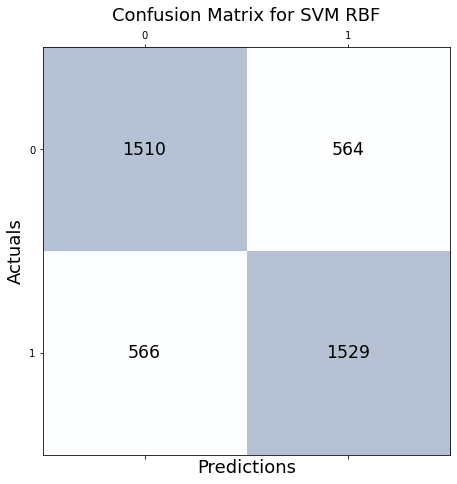

In [60]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predrbf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for SVM RBF', fontsize=18)
plt.show()

In [61]:
#Classification report for SVM POLYNOMIAL

print(classification_report(y_test,y_predpoly))

              precision    recall  f1-score   support

           0       0.52      0.98      0.68      2074
           1       0.88      0.12      0.20      2095

    accuracy                           0.55      4169
   macro avg       0.70      0.55      0.44      4169
weighted avg       0.70      0.55      0.44      4169



# Logistic Regression Modeling

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
# Make predictions on the test set
y_predlr = model_lr.predict(x_test)

In [65]:
# Evaluate the Logistic Regression model
accuracy_LR = accuracy_score(y_test, y_predlr)
list_LR = accuracy_LR
print("Accuracy:", accuracy_LR)

Accuracy: 0.8121851763012713


In [66]:
#Classification report for Logistic Regression
print(classification_report(y_test,y_predlr))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2074
           1       0.85      0.76      0.80      2095

    accuracy                           0.81      4169
   macro avg       0.82      0.81      0.81      4169
weighted avg       0.82      0.81      0.81      4169



## KNN Modeling

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [68]:
# Create and train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
# Make predictions on the test set
y_predknn = model_knn.predict(x_test)

In [70]:
# Evaluate the model
accuracy_KNN = accuracy_score(y_test, y_predknn)
list_KNN = accuracy_KNN
print("Accuracy:", accuracy_KNN)

Accuracy: 0.8815063564403934


In [71]:
#Classification report on KNN
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2074
           1       0.83      0.96      0.89      2095

    accuracy                           0.88      4169
   macro avg       0.89      0.88      0.88      4169
weighted avg       0.89      0.88      0.88      4169



## Gausian NaveBayes Modeling

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [73]:
accuracy = nb.score(x_test, y_test)
accuracy


0.7642120412568961

In [74]:
y_prednb = nb.predict(x_test)
accuracy_NB = accuracy_score(y_test,y_prednb)
list_NB = accuracy_NB
accuracy_NB

0.7642120412568961

In [75]:
print(classification_report(y_test,y_prednb))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2074
           1       0.82      0.68      0.74      2095

    accuracy                           0.76      4169
   macro avg       0.77      0.76      0.76      4169
weighted avg       0.77      0.76      0.76      4169



# Comparing classifiers 

In [76]:
names = ["Random_Forest", "Decision_Tree", "RBF_SVM", "Polynomial_SVM","Nearest_Neighbors","Naive_Bayes", "Logistic_R"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()
   ]
print(classifiers)
print(names)

[KNeighborsClassifier(), SVC(kernel='poly'), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), LogisticRegression()]
['Random_Forest', 'Decision_Tree', 'RBF_SVM', 'Polynomial_SVM', 'Nearest_Neighbors', 'Naive_Bayes', 'Logistic_R']


### Storing all the accuracy scores in a list


In [77]:
scores = []
scores.append(list_Randf)
scores.append(list_DT)
scores.append(list_rbf)
scores.append(list_poly)
scores.append(list_KNN)
scores.append(list_NB)
scores.append(list_LR)
scores

[0.9673782681698249,
 0.953705924682178,
 0.7289517869992804,
 0.5471336051810985,
 0.8815063564403934,
 0.7642120412568961,
 0.8121851763012713]

In [78]:
model_perf = pd.DataFrame()
model_perf['name'] = names
model_perf['score'] = scores
model_perf

,name,score
0,Random_Forest,0.967378
1,Decision_Tree,0.953706
2,RBF_SVM,0.728952
3,Polynomial_SVM,0.547134
4,Nearest_Neighbors,0.881506
5,Naive_Bayes,0.764212
6,Logistic_R,0.812185


In [79]:
cm = sns.light_palette("green", as_cmap=True)
s = model_perf.style.background_gradient(cmap=cm)
s

,name,score
0,Random_Forest,0.967378
1,Decision_Tree,0.953706
2,RBF_SVM,0.728952
3,Polynomial_SVM,0.547134
4,Nearest_Neighbors,0.881506
5,Naive_Bayes,0.764212
6,Logistic_R,0.812185


<b> As you can see the Random Forest has the highest accuracy so we'll be using this model for our interface(Flask)

In [90]:
predicting1 = rf.predict([[15,12.235,0.5426,0.4528,10,0,7,4,5,2,0]])
predicting1[0]

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [94]:
predicting2 = rf.predict([[27,798.33,0,0.0126,22.916,0.8,2,3,1,2,0]])
predicting2[0]

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

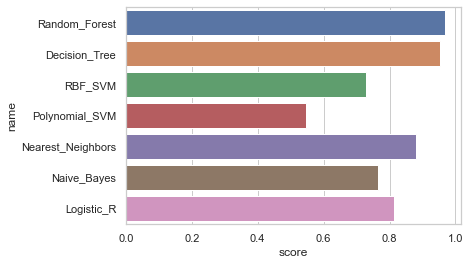

In [81]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=model_perf)

In [82]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))